In [15]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
import tensorflow as tf
from tensorflow.keras.layers import Dense,InputLayer
from tensorflow.keras.models import Sequential

In [18]:
df = pd.read_csv("teen_phone_addiction_dataset.csv")
df.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   int64  
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        3000 non-null   

In [20]:
df.isnull().sum()

,0
ID,0
Name,0
Age,0
Gender,0
Location,0
School_Grade,0
Daily_Usage_Hours,0
Sleep_Hours,0
Academic_Performance,0
Social_Interactions,0


In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df.shape

(3000, 25)

In [23]:
df.drop("ID",axis=1,inplace=True)

In [24]:
df.drop("Name",axis=1,inplace=True)

In [25]:
categorical = df.select_dtypes(include=["object","category"]).columns
numerical = df.select_dtypes(include=["int64","float64"]).columns
print(f"Categorical: {categorical}")
print(f"Numerical: {numerical}")

Categorical: Index(['Gender', 'Location', 'School_Grade', 'Phone_Usage_Purpose'], dtype='object')
Numerical: Index(['Age', 'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance',
       'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level',
       'Depression_Level', 'Self_Esteem', 'Parental_Control',
       'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily',
       'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education',
       'Family_Communication', 'Weekend_Usage_Hours', 'Addiction_Level'],
      dtype='object')


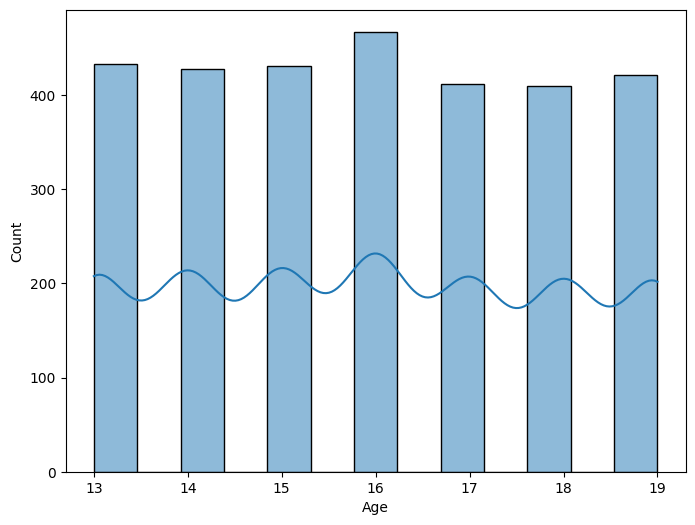

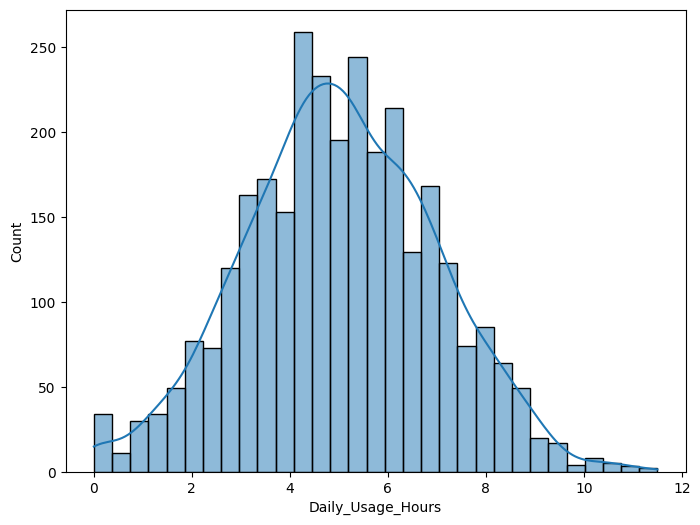

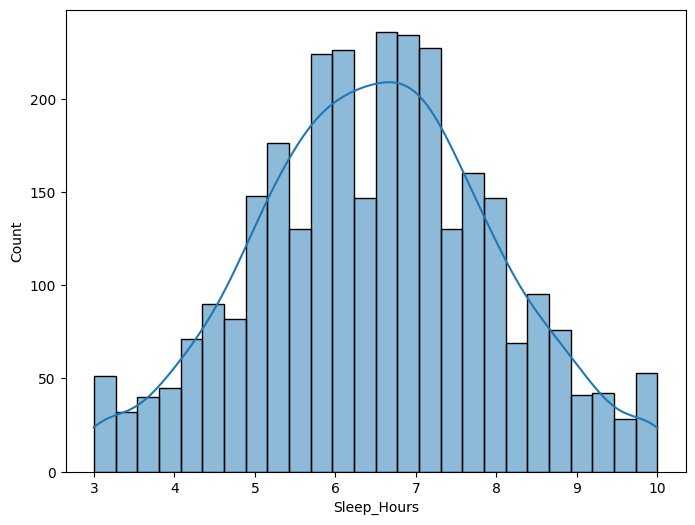

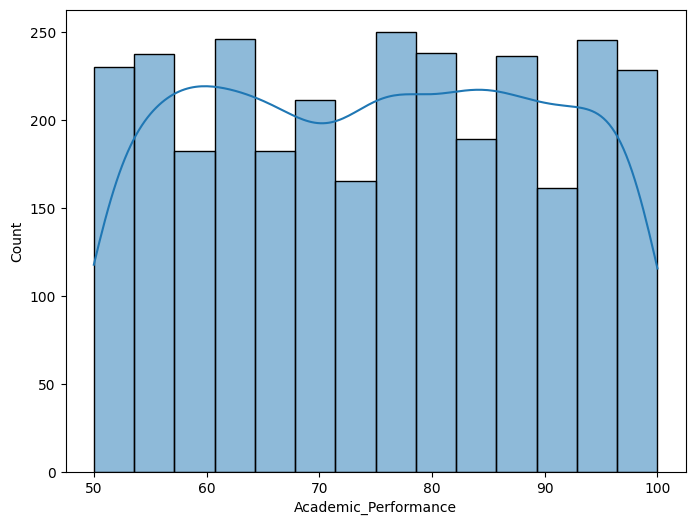

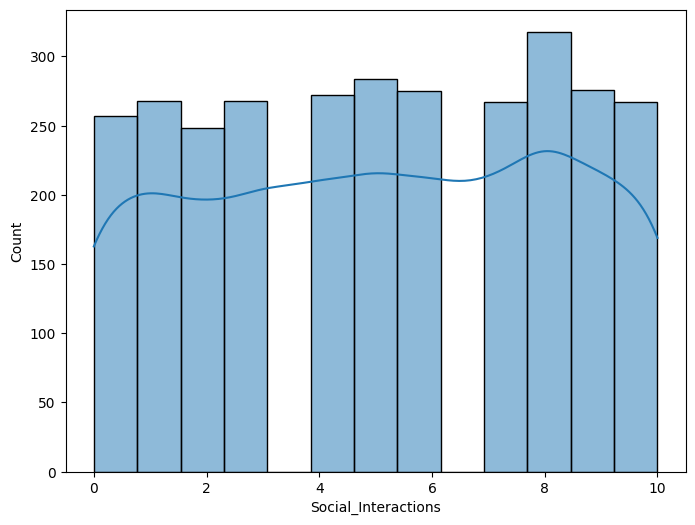

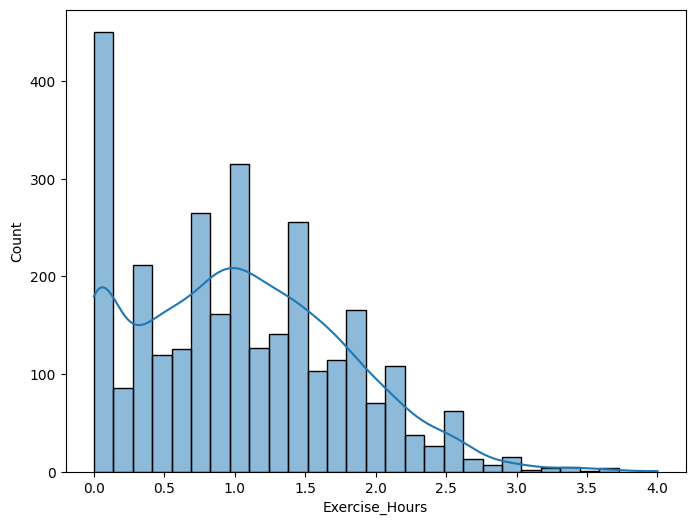

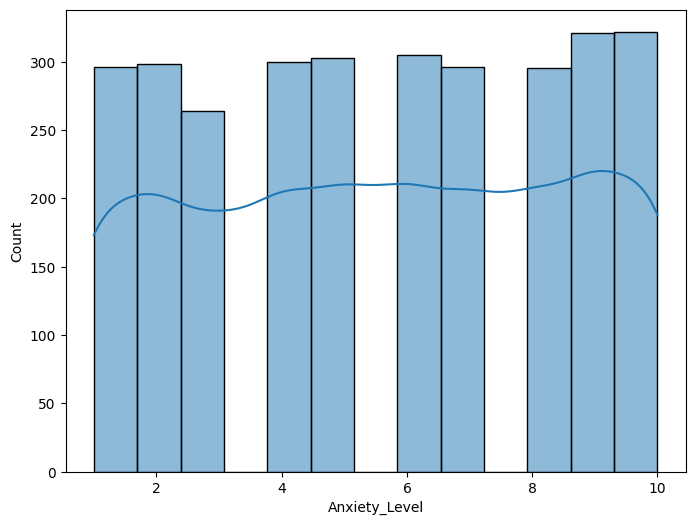

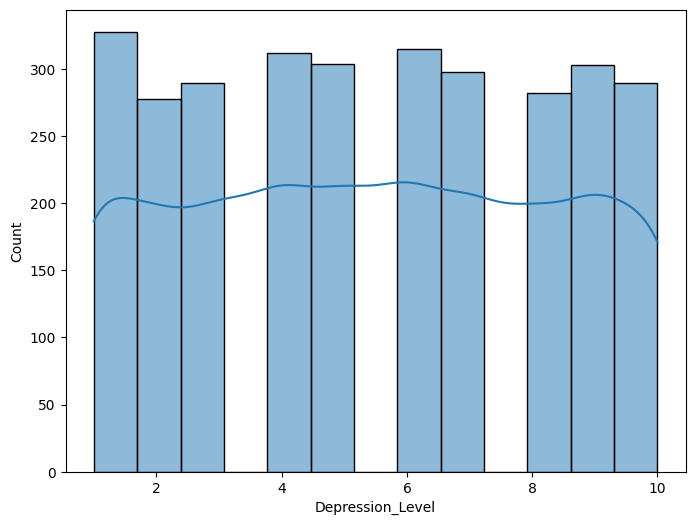

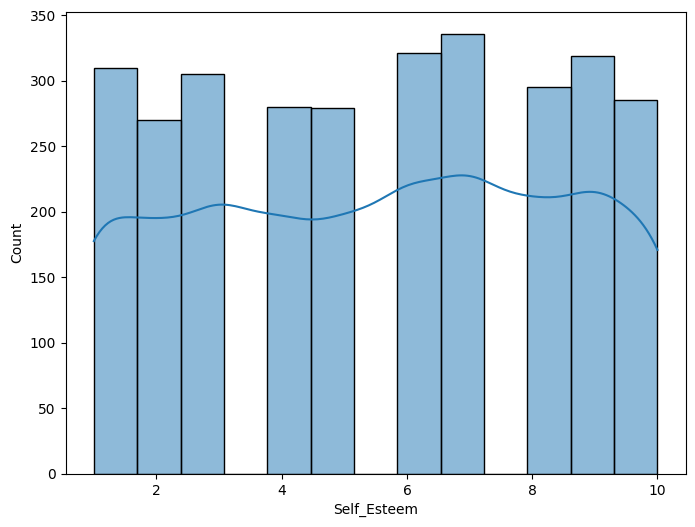

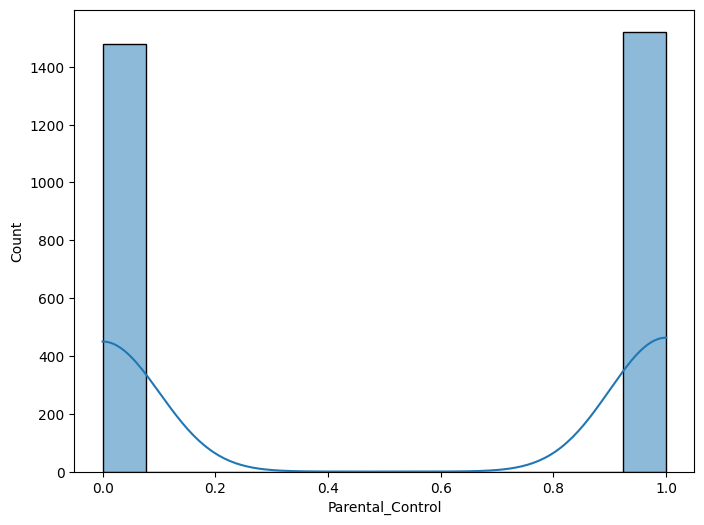

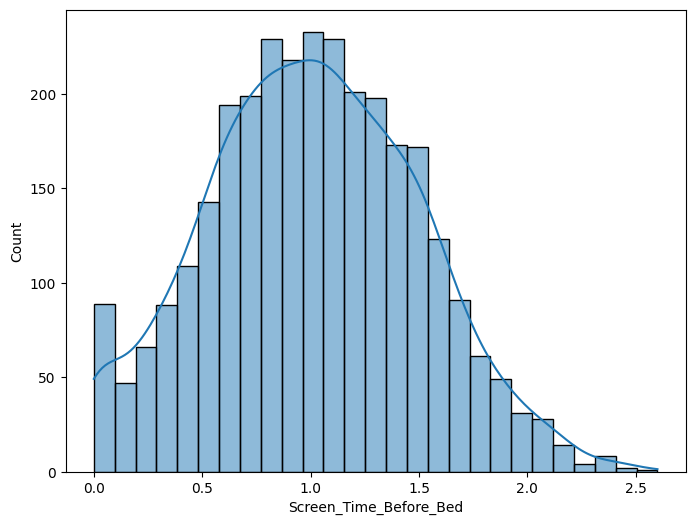

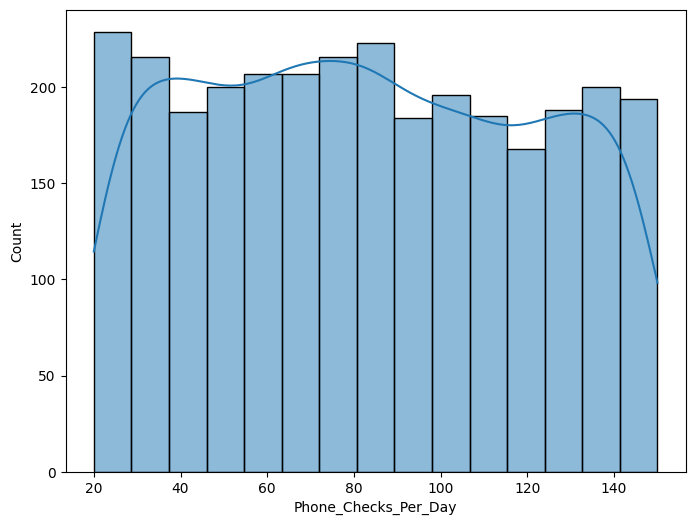

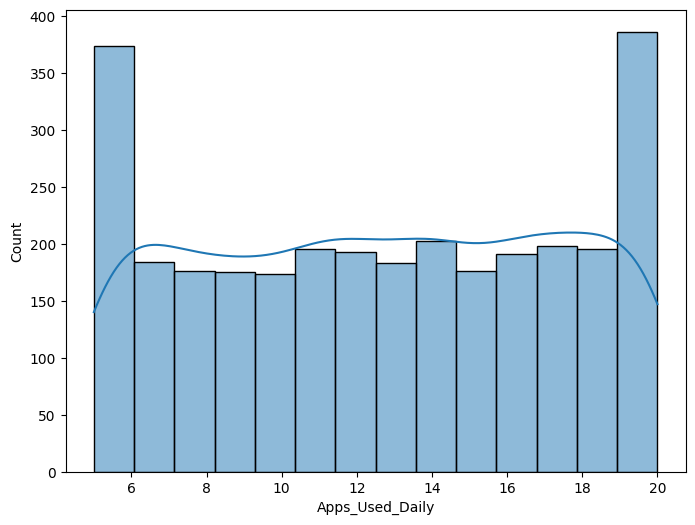

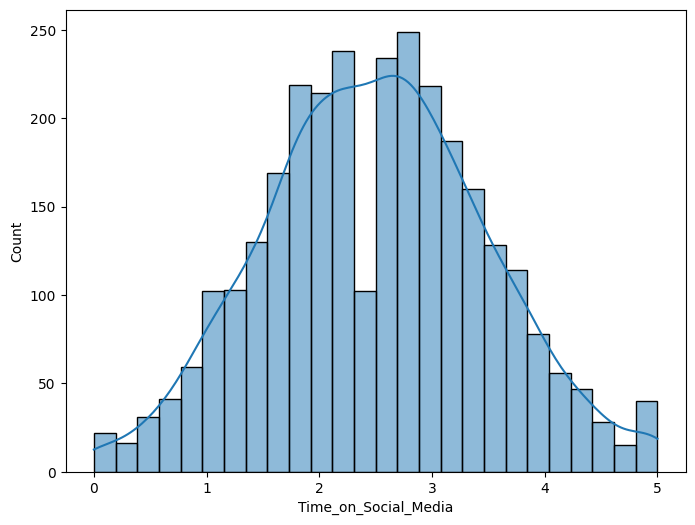

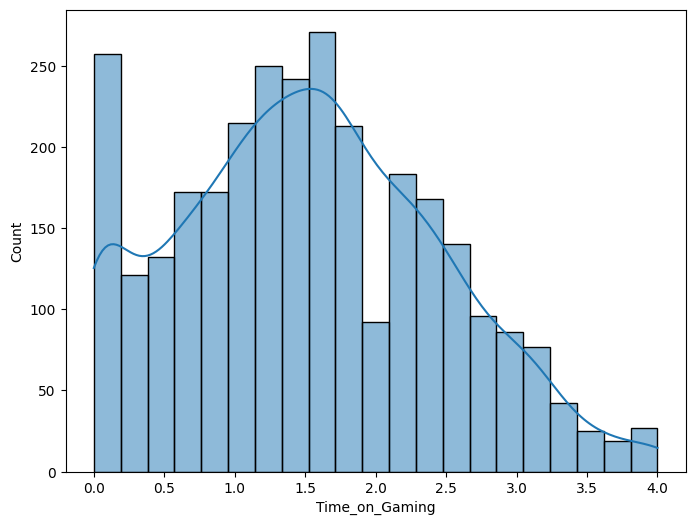

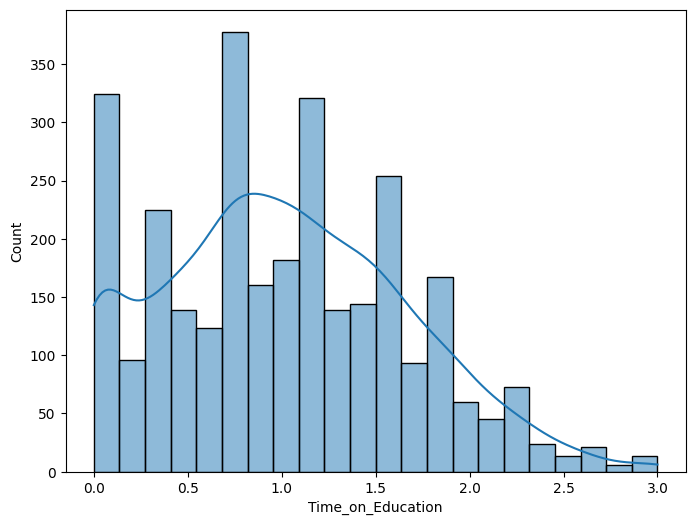

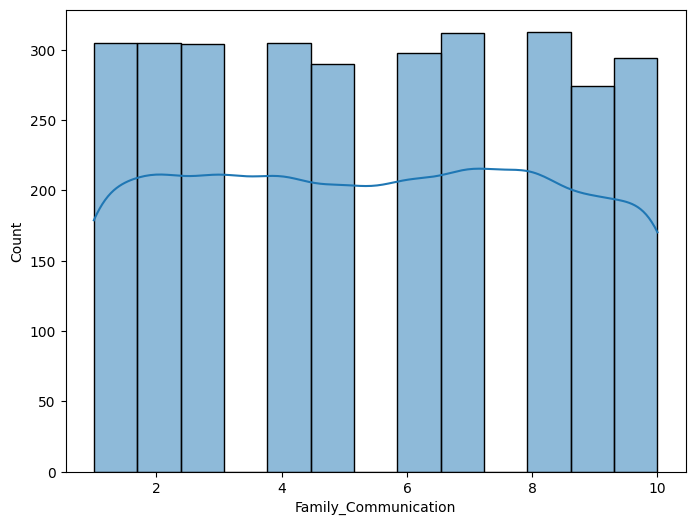

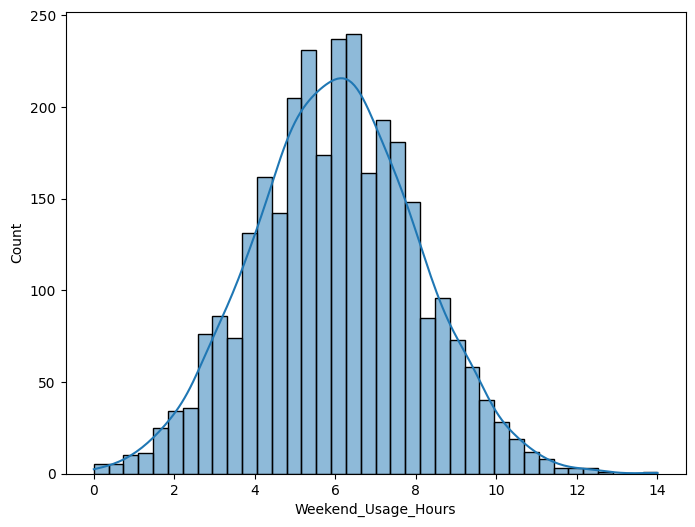

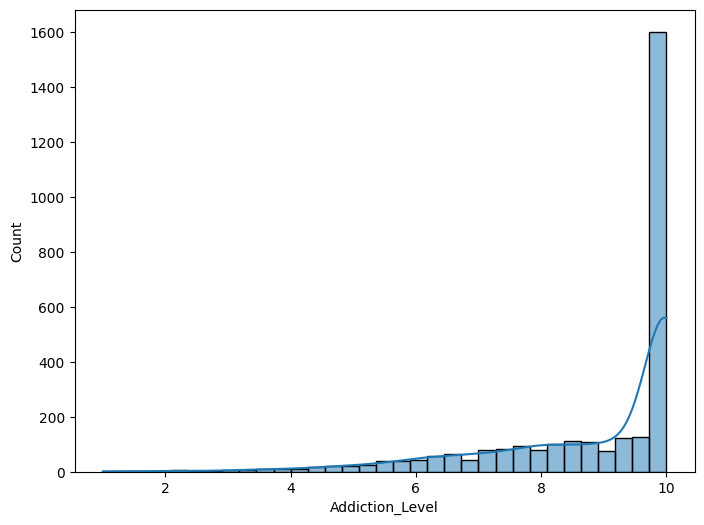

In [26]:
for col in numerical:
  plt.figure(figsize=(8,6))
  sns.histplot(df[col],kde=True)

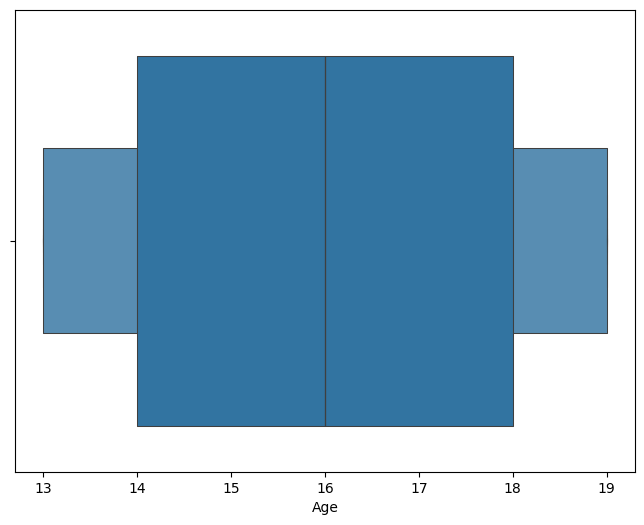

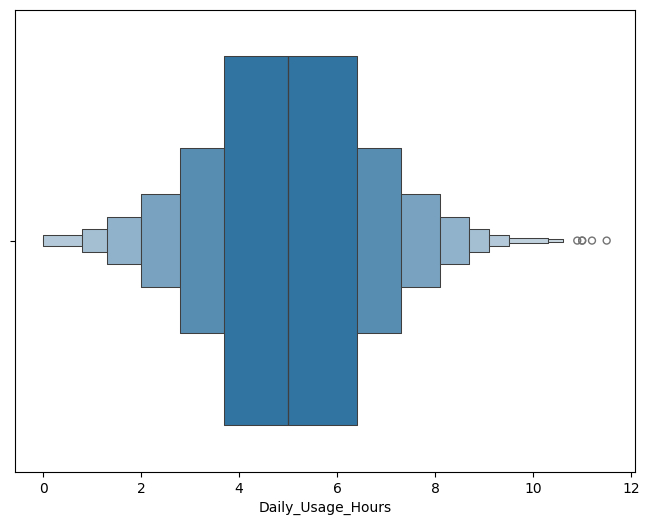

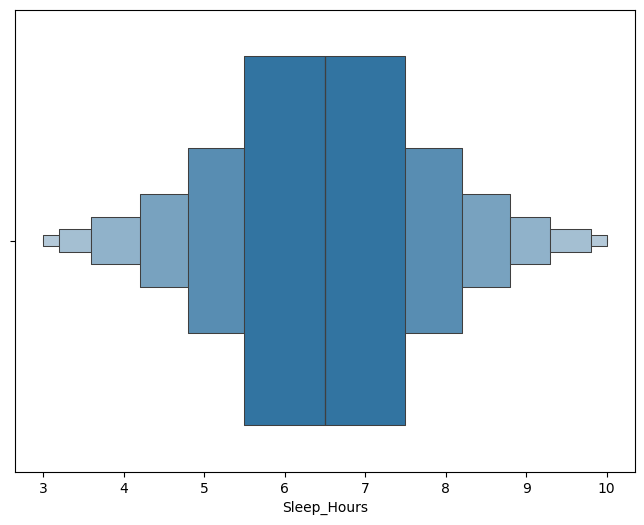

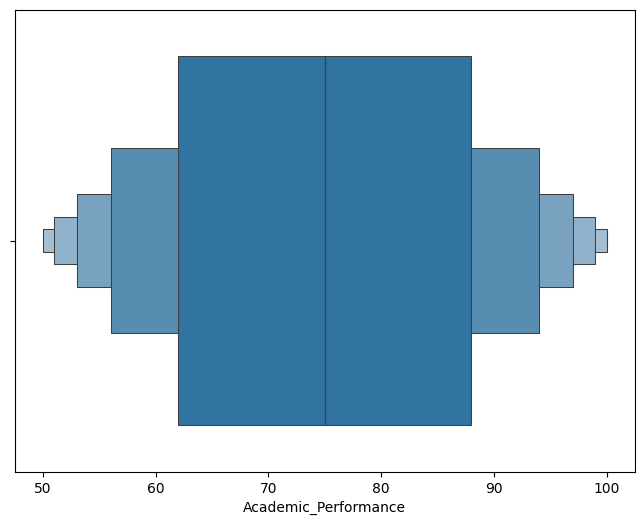

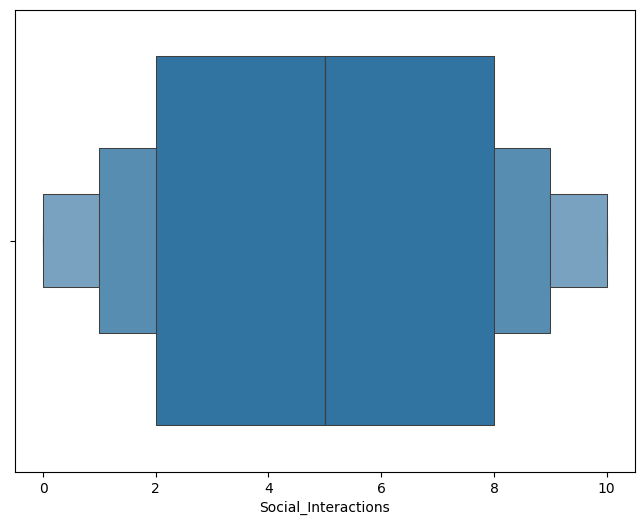

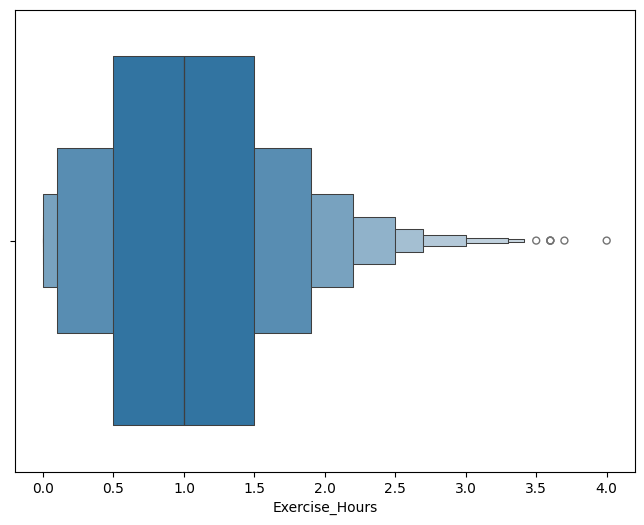

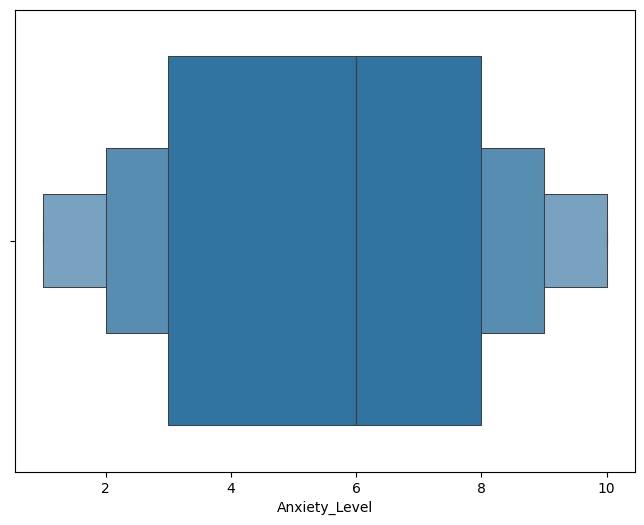

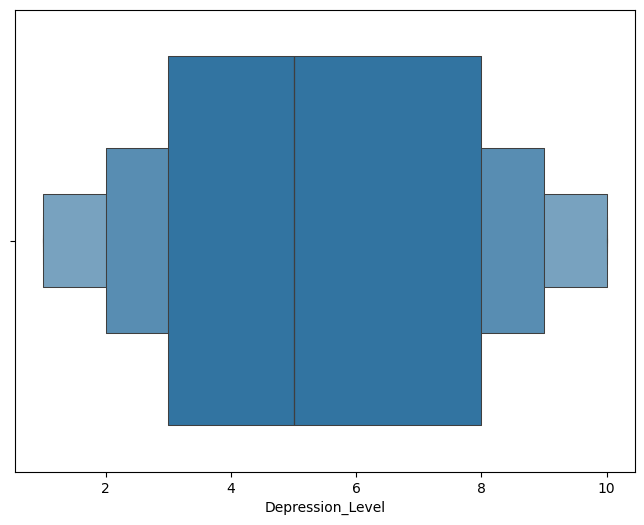

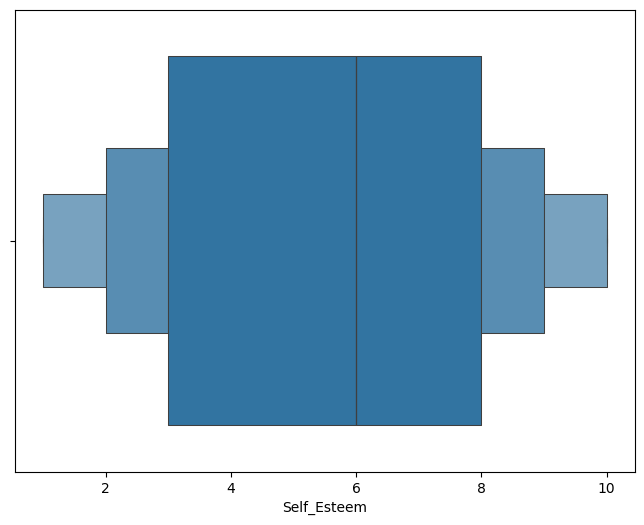

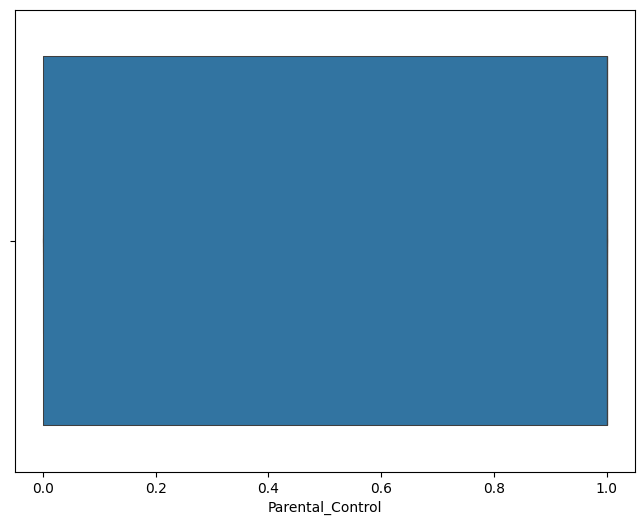

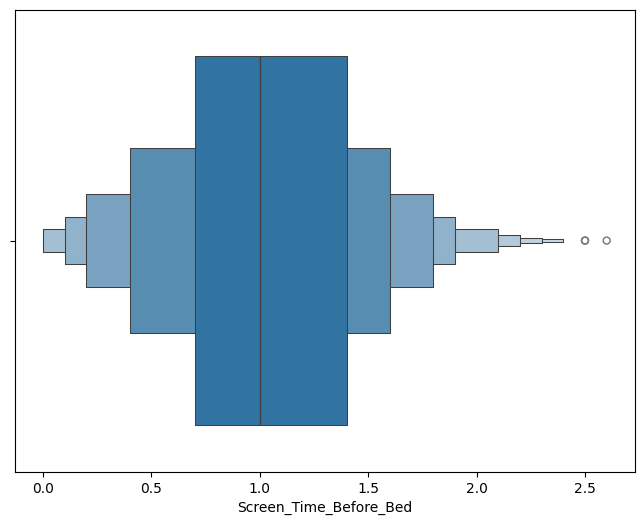

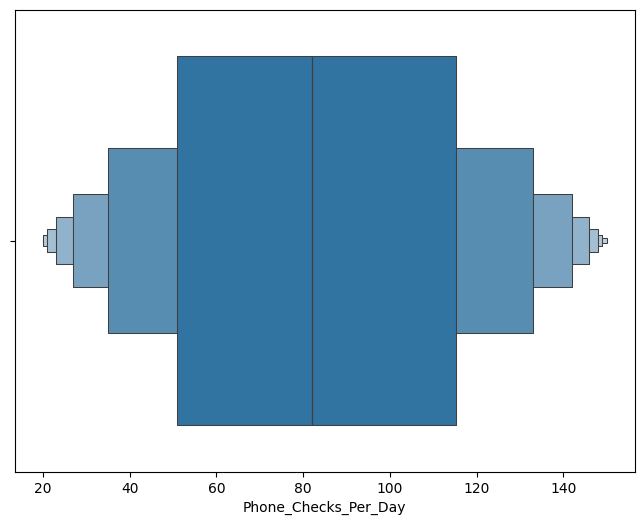

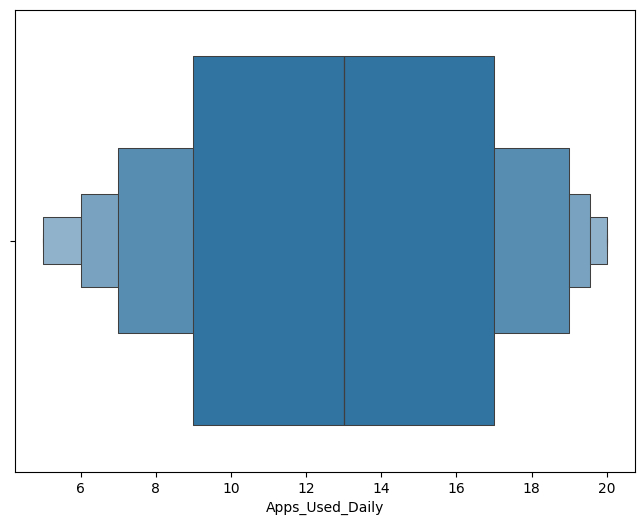

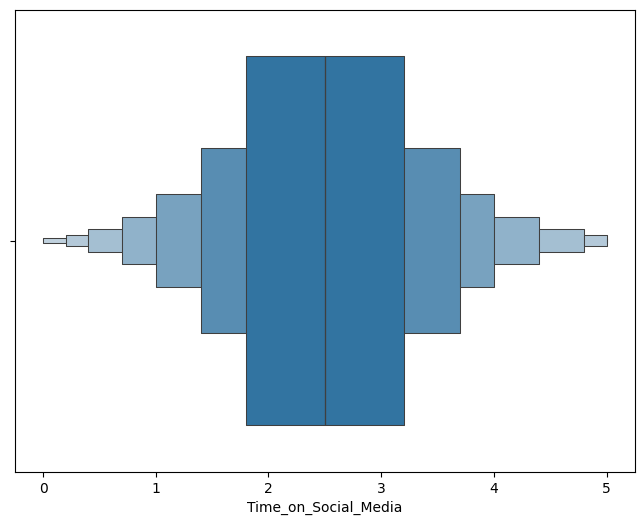

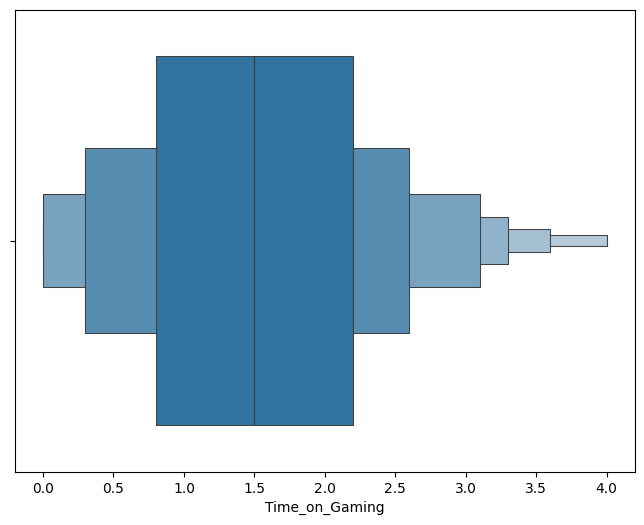

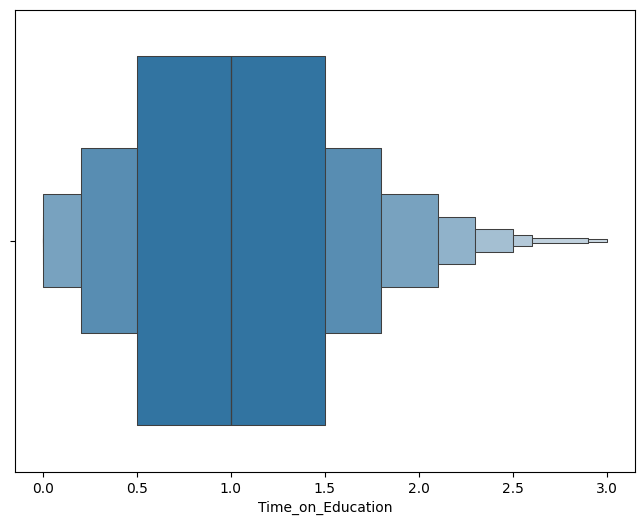

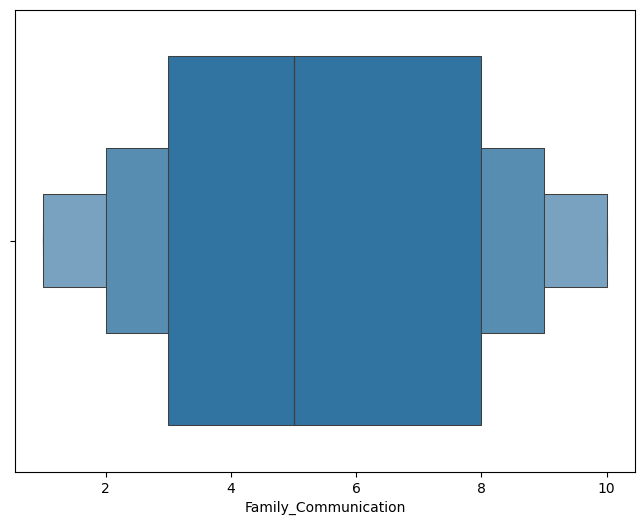

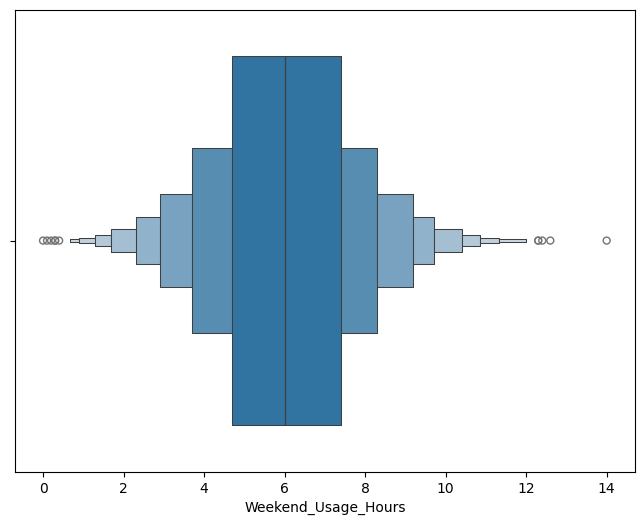

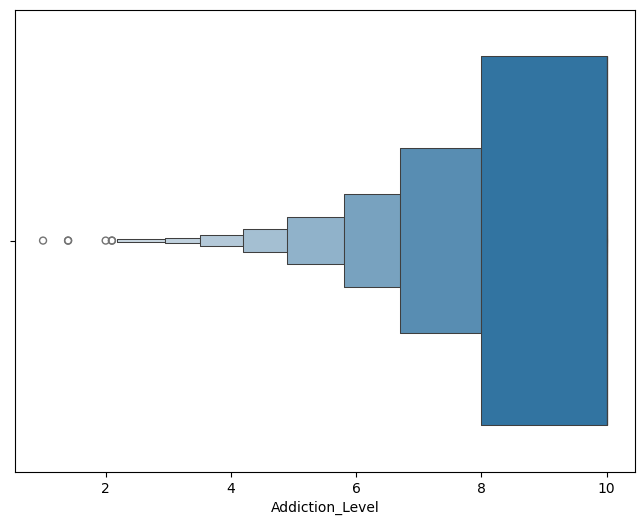

In [27]:
for col in numerical:
  plt.figure(figsize=(8,6))
  sns.boxenplot(x=df[col])

Error in callback <function _draw_all_if_interactive at 0x7eb46b9cccc0> (for post_execute):


KeyboardInterrupt: 

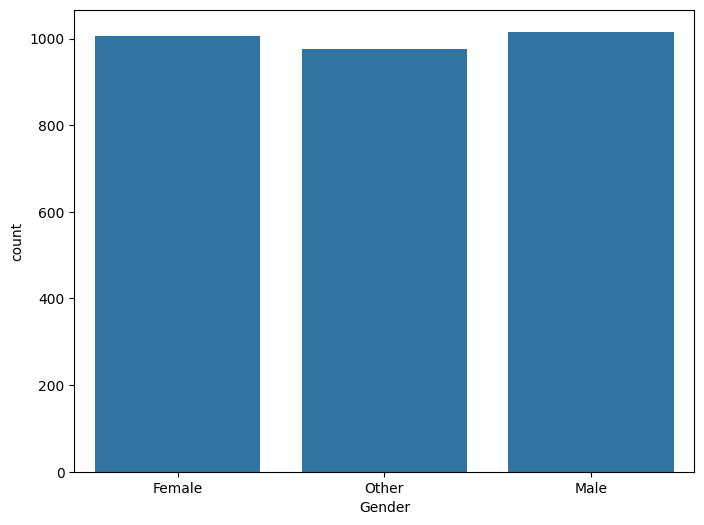

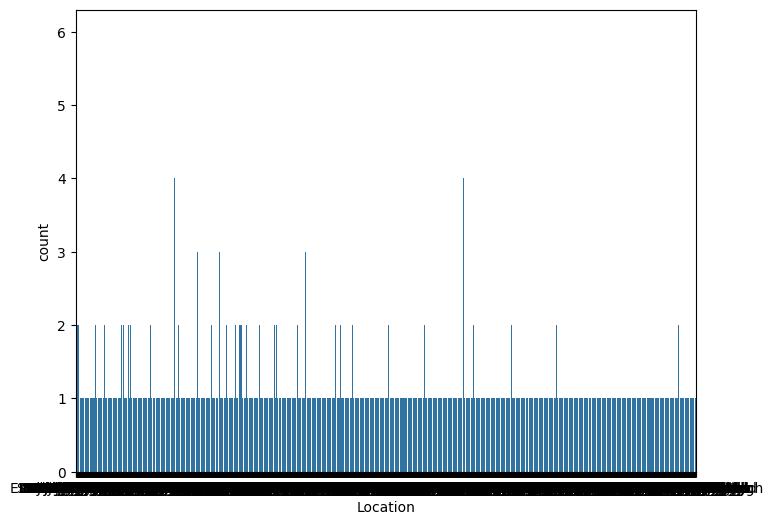

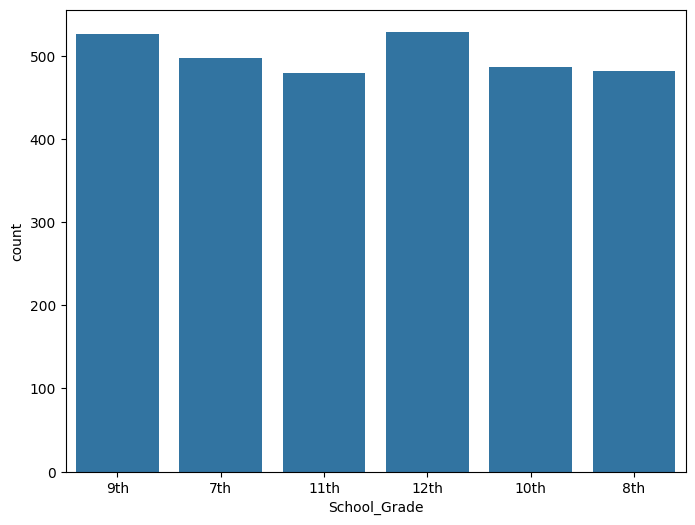

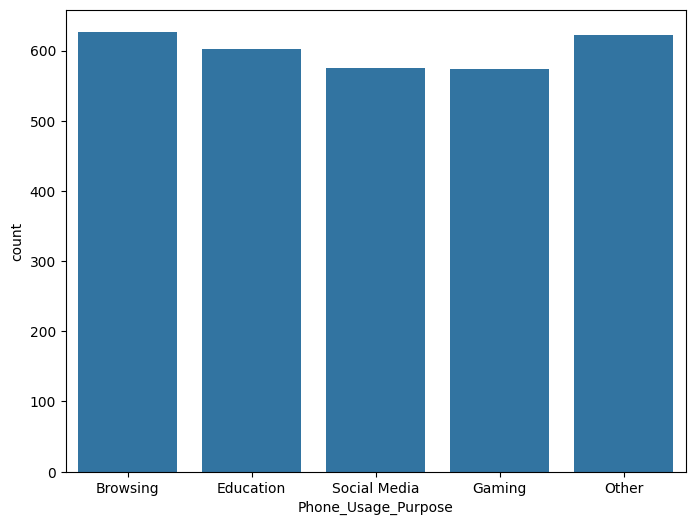

In [28]:
for col in categorical:
  plt.figure(figsize=(8,6))
  sns.countplot(x =df[col])

<Axes: >

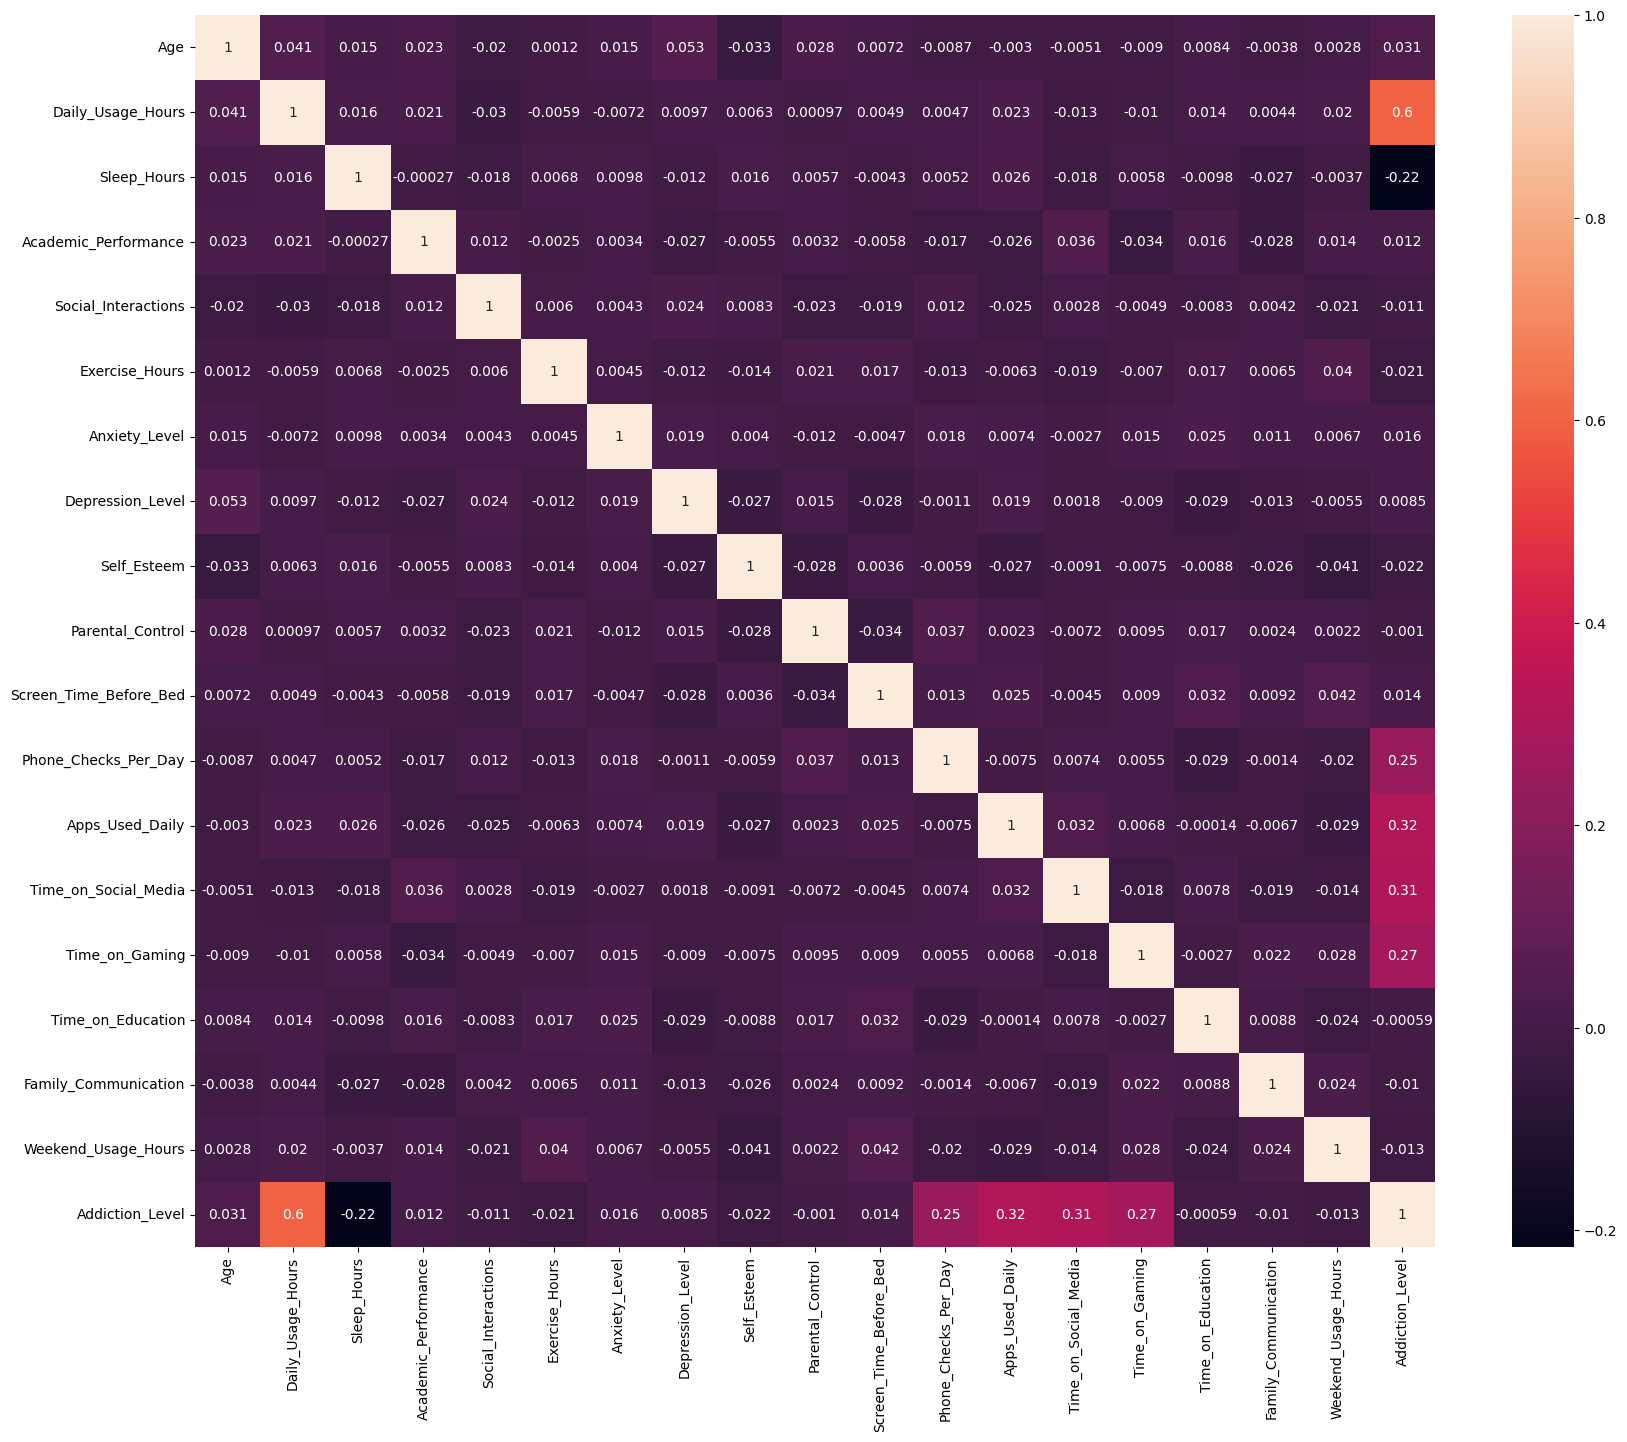

In [29]:
plt.figure(figsize=(20,16))
sns.heatmap(df[numerical].corr(),annot = True)

**Reasoning**:
Print the list of columns to identify the categorical columns in the dataframe.



In [30]:
print(df.columns)

Index(['Age', 'Gender', 'Location', 'School_Grade', 'Daily_Usage_Hours',
       'Sleep_Hours', 'Academic_Performance', 'Social_Interactions',
       'Exercise_Hours', 'Anxiety_Level', 'Depression_Level', 'Self_Esteem',
       'Parental_Control', 'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day',
       'Apps_Used_Daily', 'Time_on_Social_Media', 'Time_on_Gaming',
       'Time_on_Education', 'Phone_Usage_Purpose', 'Family_Communication',
       'Weekend_Usage_Hours', 'Addiction_Level'],
      dtype='object')


In [31]:
categorical_cols = ['Gender', 'Location', 'School_Grade', 'Phone_Usage_Purpose']
df = pd.get_dummies(df, columns=categorical_cols)
display(df.head())

,Age,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,Parental_Control,...,School_Grade_11th,School_Grade_12th,School_Grade_7th,School_Grade_8th,School_Grade_9th,Phone_Usage_Purpose_Browsing,Phone_Usage_Purpose_Education,Phone_Usage_Purpose_Gaming,Phone_Usage_Purpose_Other,Phone_Usage_Purpose_Social Media
0,13,4.0,6.1,78,5,0.1,10,3,8,0,...,False,False,False,False,True,True,False,False,False,False
1,17,5.5,6.5,70,5,0.0,3,7,3,0,...,False,False,True,False,False,True,False,False,False,False
2,13,5.8,5.5,93,8,0.8,2,3,10,0,...,True,False,False,False,False,False,True,False,False,False
3,18,3.1,3.9,78,8,1.6,9,10,3,0,...,False,True,False,False,False,False,False,False,False,True
4,14,2.5,6.7,56,4,1.1,1,5,1,0,...,False,False,False,False,True,False,False,True,False,False


In [32]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('Addiction_Level')
print(numerical_cols)

['Age', 'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance', 'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level', 'Depression_Level', 'Self_Esteem', 'Parental_Control', 'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education', 'Family_Communication', 'Weekend_Usage_Hours']


In [33]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
display(df.head())

,Age,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,Parental_Control,...,School_Grade_11th,School_Grade_12th,School_Grade_7th,School_Grade_8th,School_Grade_9th,Phone_Usage_Purpose_Browsing,Phone_Usage_Purpose_Education,Phone_Usage_Purpose_Gaming,Phone_Usage_Purpose_Other,Phone_Usage_Purpose_Social Media
0,-1.492927,-0.521767,-0.261507,0.207923,-0.031116,-1.280695,1.525848,-0.856937,0.857842,-1.014776,...,False,False,False,False,True,True,False,False,False,False
1,0.517975,0.245036,0.006866,-0.336973,-0.031116,-1.416842,-0.896133,0.536268,-0.890240,-1.014776,...,False,False,True,False,False,True,False,False,False,False
2,-1.492927,0.398397,-0.664066,1.229603,0.924660,-0.327662,-1.242130,-0.856937,1.557075,-1.014776,...,True,False,False,False,False,False,True,False,False,False
3,1.020700,-0.981848,-1.737556,0.207923,0.924660,0.761519,1.179851,1.581171,-0.890240,-1.014776,...,False,True,False,False,False,False,False,False,False,True
4,-0.990202,-1.288569,0.141052,-1.290540,-0.349708,0.080781,-1.588128,-0.160335,-1.589473,-1.014776,...,False,False,False,False,True,False,False,True,False,False


In [34]:
X = df.drop('Addiction_Level', axis=1)
display(X.head())

,Age,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,Parental_Control,...,School_Grade_11th,School_Grade_12th,School_Grade_7th,School_Grade_8th,School_Grade_9th,Phone_Usage_Purpose_Browsing,Phone_Usage_Purpose_Education,Phone_Usage_Purpose_Gaming,Phone_Usage_Purpose_Other,Phone_Usage_Purpose_Social Media
0,-1.492927,-0.521767,-0.261507,0.207923,-0.031116,-1.280695,1.525848,-0.856937,0.857842,-1.014776,...,False,False,False,False,True,True,False,False,False,False
1,0.517975,0.245036,0.006866,-0.336973,-0.031116,-1.416842,-0.896133,0.536268,-0.890240,-1.014776,...,False,False,True,False,False,True,False,False,False,False
2,-1.492927,0.398397,-0.664066,1.229603,0.924660,-0.327662,-1.242130,-0.856937,1.557075,-1.014776,...,True,False,False,False,False,False,True,False,False,False
3,1.020700,-0.981848,-1.737556,0.207923,0.924660,0.761519,1.179851,1.581171,-0.890240,-1.014776,...,False,True,False,False,False,False,False,False,False,True
4,-0.990202,-1.288569,0.141052,-1.290540,-0.349708,0.080781,-1.588128,-0.160335,-1.589473,-1.014776,...,False,False,False,False,True,False,False,True,False,False


In [35]:
y = df['Addiction_Level']
display(y.head())

,Addiction_Level
0,10.0
1,10.0
2,9.2
3,9.8
4,8.6


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2400, 2758)
X_test shape: (600, 2758)
y_train shape: (2400,)
y_test shape: (600,)


In [37]:
model = Sequential([
    InputLayer(input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       353,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 361,473 (1.38 MB)

 Trainable params: 361,473 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [39]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 61.3395 - mean_absolute_error: 7.4624 - val_loss: 2.4388 - val_mean_absolute_error: 1.1894
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.5779 - mean_absolute_error: 0.9844 - val_loss: 1.0372 - val_mean_absolute_error: 0.8272
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6311 - mean_absolute_error: 0.6241 - val_loss: 0.9710 - val_mean_absolute_error: 0.7866
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.4410 - mean_absolute_error: 0.5014 - val_loss: 0.9527 - val_mean_absolute_error: 0.7957
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2901 - mean_absolute_error: 0.3911 - val_loss: 0.9410 - val_mean_absolute_error: 0.7928
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2024 - mean_absolute_error: 0.3139 - val_loss: 0.9127 - val_mean_absolute_error: 0.7808
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1131 - mean_absolute_error: 0.2221 - val_loss: 0.8

In [43]:
model.save('teen_phone_addiction_model.h5')

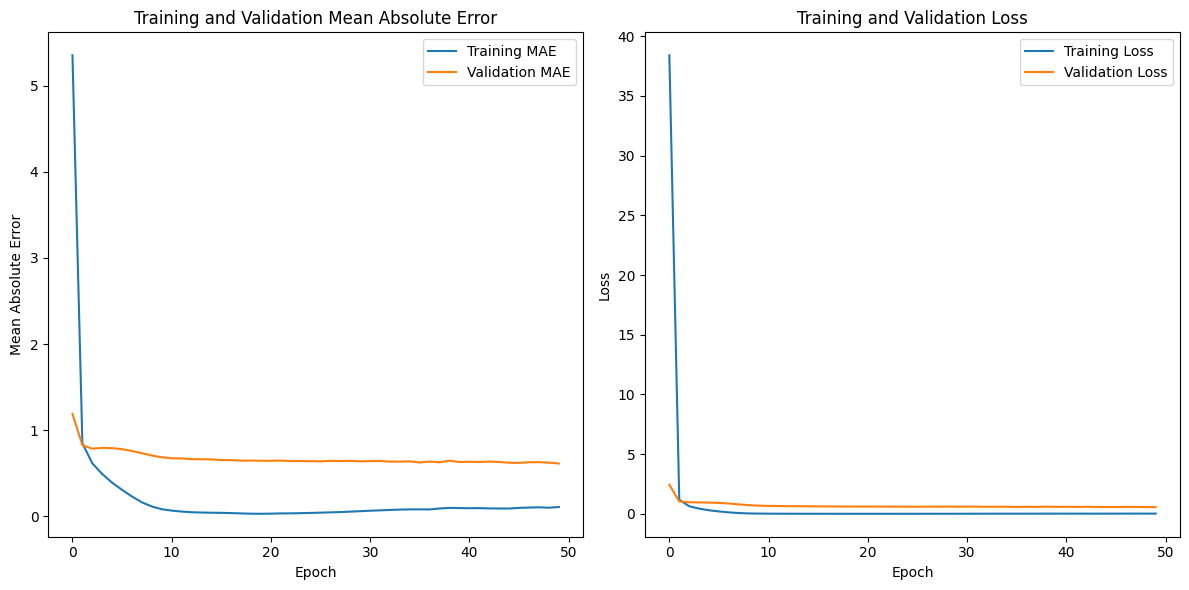

In [40]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()